In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas  as pd
import skill_metrics as sm

data = pd.read_excel("图9+图10---预测结果.xlsx")
data.drop('Unnamed: 0',axis=1)

,GRU,BiGRU,CEEMDAN-GRU,CEEMDAN-BiGRU,CEEMDAN-BiGRU-SVR,proposed,水位,Date
0,23.038099,21.267859,21.931082,21.782866,21.838222,21.972258,22.010000,2017-11-26
1,22.663837,21.450964,22.052155,21.842357,21.964998,22.008065,22.080000,2017-11-27
2,22.570765,21.492403,22.146048,21.889549,22.064340,21.970523,22.120001,2017-11-28
3,22.432734,21.425283,22.202459,21.918983,22.124528,21.867138,22.080000,2017-11-29
4,22.196461,21.335909,22.205820,21.922676,22.128663,21.762681,21.950001,2017-11-30
...,...,...,...,...,...,...,...,...
1126,21.125389,20.775904,22.111456,22.125808,22.125673,21.160316,21.209999,2020-12-26
1127,21.153152,20.751780,21.969170,22.048762,21.983299,21.020347,21.020000,2020-12-27
1128,21.165567,20.724224,21.743105,21.808496,21.696952,20.935969,20.850000,2020-12-28
1129,21.164698,20.703527,21.477303,21.667241,21.433677,20.944531,20.740000,2020-12-29


In [19]:

taylor_stats1 = sm.taylor_statistics(data['proposed'],data.水位,'1')
taylor_stats2 = sm.taylor_statistics(data['CEEMDAN-BiGRU-SVR'],data.水位,'2')
taylor_stats3 = sm.taylor_statistics(data['CEEMDAN-BiGRU'],data.水位,'3')
taylor_stats4 = sm.taylor_statistics(data['CEEMDAN-GRU'],data.水位,'3')
taylor_stats5 = sm.taylor_statistics(data['BiGRU'],data.水位,'3')
taylor_stats6 = sm.taylor_statistics(data['GRU'],data.水位,'3')
sdev = np.array([taylor_stats1['sdev'][1], taylor_stats2['sdev'][1], 
                taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],
                taylor_stats5['sdev'][1],taylor_stats4['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][1], taylor_stats2['crmsd'][1], 
                taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],
                taylor_stats5['crmsd'][1],taylor_stats4['crmsd'][1]])
ccoef = np.array([taylor_stats1['sdev'][1], taylor_stats2['sdev'][1], 
                taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],
                taylor_stats5['sdev'][1],taylor_stats4['sdev'][1]])


C:\Users\14860\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skill_metrics\taylor_diagram.py:84: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(CORs)


Text(0.5, 1.0, 'Example03 Of taylor_diagram() in Python')

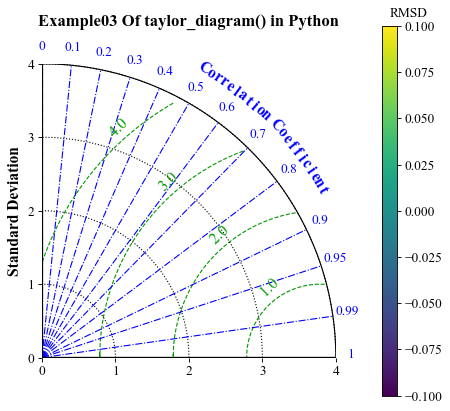

In [22]:
sm.taylor_diagram(sdev,crmsd,ccoef,
                      markerDisplayed = 'colorBar', titleColorbar = 'RMSD',
                     locationColorBar = 'EastOutside',
                      cmapzdata = crmsd, titleRMS = 'off')
text_font = {'size':'15','weight':'bold','color':'black'}
plt.title("Example03 Of taylor_diagram() in Python",fontdict=text_font,pad=35)